In [4]:
headers = {"x-nxopen-api-key": 'live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d'}
target_date = "2024-10-24"
user_list = []

# STEP 1: 랭킹 1~20,000위 → page=1~200
for page in range(1, 101):  # 1~200 page
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    
    if res.status_code != 200:
        print(f"❌ Page {page} 에러: {res.status_code}")
        continue

    data = res.json().get("ranking", [])
    for user in data:
        user_list.append({
            "ranking": user["ranking"],
            "character_name": user["character_name"],
            "world_name": user["world_name"],
            "class_name": user["class_name"],
            "sub_class_name": user["sub_class_name"],
            "trophy_score": user["trophy_score"]
        })

    print(f"✅ Page {page} 완료 | 누적 {len(user_list)}명")
    time.sleep(0.2)  # 초당 5회 제한 대응

# STEP 2: ocid 조회
for idx, user in enumerate(user_list):
    char_name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={char_name}&world_name={world}"
    res = requests.get(url, headers=headers)

    if res.status_code == 200:
        user["ocid"] = res.json().get("ocid", None)
    else:
        user["ocid"] = None
        print(f"❌ ocid 조회 실패 - {char_name} ({world})")

    if idx % 50 == 0:
        print(f"🔄 {idx}명 진행 중...")
    time.sleep(0.2)  # 호출 제한 대응

# STEP 3: CSV 저장
df = pd.DataFrame(user_list)
df.to_csv("achievement_top20000_with_ocid.csv", index=False)
print("📁 저장 완료: achievement_top20000_with_ocid.csv")

✅ Page 1 완료 | 누적 199명
✅ Page 2 완료 | 누적 400명
✅ Page 3 완료 | 누적 599명
✅ Page 4 완료 | 누적 799명
✅ Page 5 완료 | 누적 1001명
✅ Page 6 완료 | 누적 1196명
✅ Page 7 완료 | 누적 1394명
✅ Page 8 완료 | 누적 1598명
✅ Page 9 완료 | 누적 1801명
✅ Page 10 완료 | 누적 1998명
✅ Page 11 완료 | 누적 2191명
✅ Page 12 완료 | 누적 2394명
✅ Page 13 완료 | 누적 2588명
✅ Page 14 완료 | 누적 2797명
✅ Page 15 완료 | 누적 2992명
✅ Page 16 완료 | 누적 3195명
✅ Page 17 완료 | 누적 3383명
✅ Page 18 완료 | 누적 3592명
✅ Page 19 완료 | 누적 3774명
✅ Page 20 완료 | 누적 3979명
✅ Page 21 완료 | 누적 4178명
✅ Page 22 완료 | 누적 4373명
✅ Page 23 완료 | 누적 4585명
✅ Page 24 완료 | 누적 4776명
✅ Page 25 완료 | 누적 4972명
✅ Page 26 완료 | 누적 5190명
✅ Page 27 완료 | 누적 5366명
✅ Page 28 완료 | 누적 5570명
✅ Page 29 완료 | 누적 5771명
✅ Page 30 완료 | 누적 5973명
✅ Page 31 완료 | 누적 6162명
✅ Page 32 완료 | 누적 6358명
✅ Page 33 완료 | 누적 6568명
✅ Page 34 완료 | 누적 6755명
✅ Page 35 완료 | 누적 6955명
✅ Page 36 완료 | 누적 7153명
✅ Page 37 완료 | 누적 7373명
✅ Page 38 완료 | 누적 7557명
✅ Page 39 완료 | 누적 7756명
✅ Page 40 완료 | 누적 7938명
✅ Page 41 완료 | 누적 8136명
✅ Page 42 완료 | 누적 8334명
✅ Pag

In [3]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv("20241024.csv")

# 2. trophy_score ≥ 20000 필터링
df_filtered = df[df["trophy_score"] >= 20000].reset_index(drop=True)

# 3. 저장 (엑셀 호환되도록 utf-8-sig 인코딩)
df_filtered.to_csv("20241024_1.csv", index=False, encoding="utf-8-sig")

print(f"✅ 저장 완료! 유저 수: {len(df_filtered)}명")


✅ 저장 완료! 유저 수: 11599명


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 1. 한글 폰트 경로 지정 (Windows의 경우 기본 폰트로 'Malgun Gothic')
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # 리눅스 (예: Google Colab, Ubuntu)
    !apt-get -qq install -y fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='NanumBarunGothic')

# 2. 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [10]:
import pandas as pd
import requests
import time
from datetime import datetime

API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
DATE = datetime.today().strftime('2024-10-24')  # 오늘 날짜 자동 적용

df = pd.read_csv("20241024.csv")
ocid_list = df["ocid"].dropna().unique()

results = []

for idx, ocid in enumerate(ocid_list):
    status = {"ocid": ocid, "access_flag": None, "validity_flag": None, "status": None}

    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={DATE}"
        res1 = requests.get(url_basic, headers=headers)
        if res1.status_code == 200:
            status["access_flag"] = res1.json().get("access_flag", "false")
    except Exception as e:
        print(f"[{idx}] basic 조회 실패: {e}")
        status["access_flag"] = "false"

    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={DATE}"
        res2 = requests.get(url_union, headers=headers)
        if res2.status_code == 200:
            crystals = res2.json().get("union_artifact_crystal", [])
            status["validity_flag"] = "true" if crystals else "false"
    except Exception as e:
        print(f"[{idx}] artifact 조회 실패: {e}")
        status["validity_flag"] = "false"

    # 최종 상태 분류
    if status["access_flag"] == "true" and status["validity_flag"] == "true":
        status["status"] = "활성"
    elif status["access_flag"] == "false" and status["validity_flag"] == "true":
        status["status"] = "휴면"
    else:
        status["status"] = "이탈"

    results.append(status)

    if idx % 50 == 0:
        print(f"🔄 {idx}명 처리 중...")
        pd.DataFrame(results).to_csv("user_retention_status_temp.csv", index=False)

    time.sleep(0.002)  # 호출 제한 대응

# 최종 저장
result_df = pd.DataFrame(results)
result_df.to_csv("user_retention_status.csv", index=False)
print("✅ 최종 저장 완료: user_retention_status.csv")


🔄 0명 처리 중...
🔄 50명 처리 중...
🔄 100명 처리 중...
🔄 150명 처리 중...
🔄 200명 처리 중...
🔄 250명 처리 중...
🔄 300명 처리 중...
🔄 350명 처리 중...
🔄 400명 처리 중...
🔄 450명 처리 중...
🔄 500명 처리 중...
🔄 550명 처리 중...
🔄 600명 처리 중...
🔄 650명 처리 중...
🔄 700명 처리 중...
🔄 750명 처리 중...
🔄 800명 처리 중...
🔄 850명 처리 중...
🔄 900명 처리 중...
🔄 950명 처리 중...
🔄 1000명 처리 중...
🔄 1050명 처리 중...
🔄 1100명 처리 중...
🔄 1150명 처리 중...
🔄 1200명 처리 중...
🔄 1250명 처리 중...
🔄 1300명 처리 중...
🔄 1350명 처리 중...
🔄 1400명 처리 중...
🔄 1450명 처리 중...
🔄 1500명 처리 중...
🔄 1550명 처리 중...
🔄 1600명 처리 중...
🔄 1650명 처리 중...
🔄 1700명 처리 중...
🔄 1750명 처리 중...
🔄 1800명 처리 중...
🔄 1850명 처리 중...
🔄 1900명 처리 중...
🔄 1950명 처리 중...
🔄 2000명 처리 중...
🔄 2050명 처리 중...
🔄 2100명 처리 중...
🔄 2150명 처리 중...
🔄 2200명 처리 중...
🔄 2250명 처리 중...
🔄 2300명 처리 중...
🔄 2350명 처리 중...
🔄 2400명 처리 중...
🔄 2450명 처리 중...
🔄 2500명 처리 중...
🔄 2550명 처리 중...
🔄 2600명 처리 중...
🔄 2650명 처리 중...
🔄 2700명 처리 중...
🔄 2750명 처리 중...
🔄 2800명 처리 중...
🔄 2850명 처리 중...
🔄 2900명 처리 중...
🔄 2950명 처리 중...
🔄 3000명 처리 중...
🔄 3050명 처리 중...
🔄 3100명 처리 중...
🔄 3150명 처리 중...

In [3]:
import pandas as pd

# 파일 불러오기
df1 = pd.read_csv("user_retention_status.csv", encoding='utf-8')  # access_flag, status 등의 정보
df2 = pd.read_csv("20241024_1.csv", encoding='utf-8')  # character_name 등 캐릭터 정보

# 병합 (inner, left, right 방식 중 선택 가능) → 여기선 left 기준 병합
df_merged = pd.merge(df1, df2, on="ocid", how="inner")

# 결과 확인
print(df_merged.head())

# 필요 시 저장
df_merged.to_csv("merged_result.csv", index=False, encoding='utf-8-sig')


                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963        True   
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...        True   
2                   2d1aab3a769bb437c61914a86979d6dd        True   
3                   60ef30bb4667577417c1ba4dc3d0c12f        True   
4                   9b33036f768f2238bdaed496db3d057f         NaN   

   validity_flag status  ranking character_name world_name class_name  \
0           True     활성        1            별표시         루나      레지스탕스   
1           True     활성        2             이뽀       엘리시움        마법사   
2           True     활성        3             그윽        크로아        마법사   
3           True     활성        4            댈람이         루나        일리움   
4          False     이탈        5           신상오리       스카니아        기사단   

  sub_class_name  trophy_score  
0            메카닉         35050  
1             비숍         34610  
2     아크메이지(불,독)         34130  
3            NaN    

In [4]:
import pandas as pd

# 파일 불러오기
df1 = pd.read_csv("user_retention_status.csv", encoding='utf-8')  # access_flag, status 등의 정보
df2 = pd.read_csv("20241024_1.csv", encoding='utf-8')  # character_name 등 캐릭터 정보

# 병합 (inner, left, right 방식 중 선택 가능) → 여기선 left 기준 병합
df_merged = pd.merge(df2, df1, on="ocid", how="inner")

# 결과 확인
print(df_merged.head())

# 필요 시 저장
df_merged.to_csv("merged_result2.csv", index=False, encoding='utf-8-sig')


   ranking character_name world_name class_name sub_class_name  trophy_score  \
0        1            별표시         루나      레지스탕스            메카닉         35050   
1        2             이뽀       엘리시움        마법사             비숍         34610   
2        3             그윽        크로아        마법사     아크메이지(불,독)         34130   
3        4            댈람이         루나        일리움            NaN         33730   
4        5           신상오리       스카니아        기사단           노블레스         33120   

                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963        True   
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...        True   
2                   2d1aab3a769bb437c61914a86979d6dd        True   
3                   60ef30bb4667577417c1ba4dc3d0c12f        True   
4                   9b33036f768f2238bdaed496db3d057f         NaN   

   validity_flag status  
0           True     활성  
1           True     활성  
2           True     활성  
3     

In [5]:
df_merged.isnull().sum()

ranking              0
character_name       0
world_name           0
class_name           0
sub_class_name    3701
trophy_score         0
ocid                 0
access_flag        561
validity_flag        0
status               0
dtype: int64

In [7]:

# 조건: 리부트 or 리부트2 & access_flag가 NaN
df_reboot_null_access = df_merged[
    (df_merged['world_name'].isin(['리부트', '리부트2'])) &
    (df_merged['access_flag'].isna())
]

# 결과 확인
print(df_reboot_null_access.head())  # 상위 5개 행
print("결측치 행 수:", len(df_reboot_null_access))


     ranking character_name world_name class_name sub_class_name  \
130      132            l아영       리부트2         호영            NaN   
132      134           카빙쟁이        리부트         아델            NaN   
171      172             폭귀       리부트2      레지스탕스          데몬어벤져   
183      185           블렌차드       리부트2        기사단          스트라이커   
186      186           듀얼개시       리부트2        초월자             제로   

     trophy_score                                               ocid  \
130         27750  1cf08123ac363273471ff23b8bcb7fc8efe8d04e6d233b...   
132         27700                   456d1fca882c574774213702ae96e4ac   
171         27300  02221d903e2d7ab28f6f2795df8807c2efe8d04e6d233b...   
183         27110  df814b81b0bcb20a279a778963ae648fefe8d04e6d233b...   
186         27050  a1343bf98315478d29d94f0348f1d421efe8d04e6d233b...   

    access_flag  validity_flag status  
130         NaN          False     이탈  
132         NaN          False     이탈  
171         NaN          False     이탈 

In [8]:
df_reboot = df_merged[df_merged['world_name'].isin(['리부트', '리부트2'])]
print("리부트/리부트2 유저 수:", len(df_reboot))


리부트/리부트2 유저 수: 3305


In [12]:
import pandas as pd
import requests
import time

# API Key 설정
API_KEY = 'live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d'
headers = {"x-nxopen-api-key": API_KEY}

# 데이터 불러오기
df = pd.read_csv("non_reboot_null_access.csv")

# 조회할 날짜 (기준일)
target_date = "2025-04-10"

# 결과 저장용 리스트
results = []

# API 호출
for idx, row in df.iterrows():
    ocid = row["ocid"]
    url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
    
    try:
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            data = res.json()
            results.append({
                "ocid": ocid,
                "access_flag": data.get("access_flag"),
                "character_level": data.get("character_level")
            })
        else:
            results.append({
                "ocid": ocid,
                "access_flag": None,
                "character_level": None
            })
    except Exception as e:
        results.append({
            "ocid": ocid,
            "access_flag": None,
            "character_level": None
        })
    
    # API 요청 제한 방지: 초당 5회 이하
    time.sleep(0.25)

# 결과 DataFrame으로 저장
df_result = pd.DataFrame(results)

# 저장
df_result.to_csv("access_flag_and_level_result2.csv", index=False, encoding='utf-8-sig')


In [11]:
import pandas as pd
import requests
import time

# API Key 설정
API_KEY ='live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d'
headers = {"x-nxopen-api-key": API_KEY}

# 데이터 불러오기
df = pd.read_csv("non_reboot_null_access.csv")

# 조회할 날짜 (기준일)
target_date = "2024-10-24"

# 결과 저장용 리스트
results = []

# API 호출
for idx, row in df.iterrows():
    ocid = row["ocid"]
    url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
    
    try:
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            data = res.json()
            results.append({
                "ocid": ocid,
                "character_level": data.get("character_level")
            })
        else:
            results.append({
                "ocid": ocid,
                "character_level": None
            })
    except Exception as e:
        results.append({
            "ocid": ocid,
            "character_level": None
        })
    
    # API 요청 제한 방지: 초당 5회 이하
    time.sleep(0.25)

# 결과 DataFrame으로 저장
df_result = pd.DataFrame(results)

# 저장
df_result.to_csv("level_result.csv", index=False, encoding='utf-8-sig')


In [13]:
import pandas as pd

# 파일 경로 지정
file_old = "inner_join_____API________.csv"              # 기존 데이터
file_latest = "access_flag_and_level_result2.csv"        # 최신 API 결과

# 데이터 불러오기
df_old = pd.read_csv(file_old, encoding='utf-8')
df_latest = pd.read_csv(file_latest, encoding='utf-8')

# 컬럼명 중복 방지 위해 rename
df_latest = df_latest.rename(columns={
    'access_flag': 'access_flag_latest',
    'character_level': 'character_level_latest'
})

# ocid 기준 inner join
df_joined = pd.merge(df_old, df_latest, on='ocid', how='inner')

# 결과 저장 (선택)
df_joined.to_csv("joined_result_final.csv", index=False, encoding='utf-8-sig')

# 확인
print(df_joined.head())


   Unnamed: 0  ranking character_name world_name class_name sub_class_name  \
0           0        5           신상오리       스카니아        기사단           노블레스   
1           1       34         음흉한비제이       엘리시움         카인            NaN   
2           2       82            냠규리        크로아         아델            NaN   
3           3       92          진스미스장        크로아         에반            NaN   
4           4      245           피코누나         루나        마법사             비숍   

   trophy_score                                               ocid  \
0         33120                   9b33036f768f2238bdaed496db3d057f   
1         30280  de575a58d5a8a4ec87ef3187c91c58fbefe8d04e6d233b...   
2         28680                   ead9fc0180fd258e45dec5839d8f2efc   
3         28420                   b7a7132042db7e862a590c23c773122b   
4         26610                   5b052c6cddafe0d656de713e35345074   

   access_flag_x  validity_flag status access_flag_y  character_level  \
0            NaN          False     이

In [18]:
import requests
import time
import pandas as pd

# API Key
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-10-24"

# STEP 1: 업적 랭킹에서 캐릭명 + 서버명 확보
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u.get("trophy_score")  
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")

# STEP 2: ocid 조회
print("▶ STEP 2: ocid 조회")
for idx, user in enumerate(user_list):
    name, world = user["character_name"], user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    res = requests.get(url, headers=headers)
    user["ocid"] = res.json().get("ocid") if res.status_code == 200 else None
    if (idx + 1) % 2000 == 0:
        print(f"🔹 STEP 2 진행률: {(idx + 1) // 200}%")
    time.sleep(0.002)

# STEP 3: ocid 기반으로 세부 정보 수집
print("▶ STEP 3: 세부 정보 조회")
detailed_info = []

for idx, user in enumerate(user_list):
    ocid = user.get("ocid")
    if not ocid:
        continue

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user.get("trophy_score"),  
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 기본 정보
    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            j = res.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["popularity"] = j.get("popularity")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except:
        pass

    # 유니온 정보
    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            result["union_level"] = res.json().get("union_level")
    except:
        pass

    # 유니온 아티팩트 정보
    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            union_info = res.json()
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")

            # 유효성 플래그 체크
            for crystal in union_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except:
        pass

    detailed_info.append(result)

    if (idx + 1) % 2000 == 0:
        print(f"🔹 STEP 3 진행률: {(idx + 1) // 200}%")

    time.sleep(0.002)

# STEP 4: 저장
df = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df.to_csv(output_filename, index=False)
print(f"✅ 완료! 저장됨: {output_filename}")


▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
▶ STEP 2: ocid 조회
🔹 STEP 2 진행률: 10%
🔹 STEP 2 진행률: 20%
🔹 STEP 2 진행률: 30%
🔹 STEP 2 진행률: 40%
🔹 STEP 2 진행률: 50%
🔹 STEP 2 진행률: 60%
🔹 STEP 2 진행률: 70%
🔹 STEP 2 진행률: 80%
🔹 STEP 2 진행률: 90%
▶ STEP 3: 세부 정보 조회
🔹 STEP 3 진행률: 10%
🔹 STEP 3 진행률: 20%
🔹 STEP 3 진행률: 30%
🔹 STEP 3 진행률: 40%
🔹 STEP 3 진행률: 50%
🔹 STEP 3 진행률: 60%
🔹 STEP 3 진행률: 70%
🔹 STEP 3 진행률: 80%
🔹 STEP 3 진행률: 90%
✅ 완료! 저장됨: achievement_fullinfo_2024-10-24.csv


In [26]:
import pandas as pd
import requests
import time

# 🔧 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
target_date = "2024-10-24"

# 🔍 CSV 파일에서 ocid 읽기
df = pd.read_csv("achievement_fullinfo_2024-10-24.csv")
ocid_list = df["ocid"].dropna().unique().tolist()  # 중복 제거

# ✅ 결과 저장 리스트
results = []

# 🔁 반복 처리
for idx, ocid in enumerate(ocid_list):
    result = {
        "ocid": ocid,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "popularity": None
    }

    # 1. 유니온 아티팩트
    try:
        url1 = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res1 = requests.get(url1, headers=headers)
        if res1.status_code == 200:
            data1 = res1.json()
            result["union_artifact_level"] = data1.get("union_artifact_level")
            result["union_artifact_exp"] = data1.get("union_artifact_exp")
            result["union_artifact_point"] = data1.get("union_artifact_point")
    except Exception as e:
        print(f"❌ union-artifact 실패: {ocid} - {e}")

    # 2. popularity
    try:
        url2 = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res2 = requests.get(url2, headers=headers)
        if res2.status_code == 200:
            data2 = res2.json()
            result["popularity"] = data2.get("popularity")
    except Exception as e:
        print(f"❌ popularity 실패: {ocid} - {e}")

    results.append(result)

    if (idx + 1) % 200 == 0:
        print(f"✅ {idx+1}명 완료")

    time.sleep(0.05)  # API 제한 대응

# 🔄 결과 DataFrame 변환
df_fixed = pd.DataFrame(results)

# 💾 저장 (선택)
df_fixed.to_csv("fixed_union_and_popularity.csv", index=False)
print("✅ 모든 ocid 처리 완료 → fixed_union_and_popularity.csv 저장됨")

✅ 200명 완료
✅ 400명 완료
✅ 600명 완료
✅ 800명 완료
✅ 1000명 완료
✅ 1200명 완료
✅ 1400명 완료
✅ 1600명 완료
✅ 1800명 완료
✅ 2000명 완료
✅ 2200명 완료
✅ 2400명 완료
✅ 2600명 완료
✅ 2800명 완료
✅ 3000명 완료
✅ 3200명 완료
✅ 3400명 완료
✅ 3600명 완료
✅ 3800명 완료
✅ 4000명 완료
✅ 4200명 완료
✅ 4400명 완료
✅ 4600명 완료
✅ 4800명 완료
✅ 5000명 완료
✅ 5200명 완료
✅ 5400명 완료
✅ 5600명 완료
✅ 5800명 완료
✅ 6000명 완료
✅ 6200명 완료
✅ 6400명 완료
✅ 6600명 완료
✅ 6800명 완료
✅ 7000명 완료
✅ 7200명 완료
✅ 7400명 완료
✅ 7600명 완료
✅ 7800명 완료
✅ 8000명 완료
✅ 8200명 완료
✅ 8400명 완료
✅ 8600명 완료
✅ 8800명 완료
✅ 9000명 완료
✅ 9200명 완료
✅ 9400명 완료
✅ 9600명 완료
✅ 9800명 완료
✅ 10000명 완료
✅ 10200명 완료
✅ 10400명 완료
✅ 10600명 완료
✅ 10800명 완료
✅ 11000명 완료
✅ 11200명 완료
✅ 11400명 완료
✅ 11600명 완료
✅ 11800명 완료
✅ 12000명 완료
✅ 12200명 완료
✅ 12400명 완료
✅ 12600명 완료
✅ 12800명 완료
✅ 13000명 완료
✅ 13200명 완료
✅ 13400명 완료
✅ 13600명 완료
✅ 13800명 완료
✅ 14000명 완료
✅ 14200명 완료
✅ 14400명 완료
✅ 14600명 완료
✅ 14800명 완료
✅ 15000명 완료
✅ 15200명 완료
✅ 15400명 완료
✅ 15600명 완료
✅ 15800명 완료
✅ 16000명 완료
✅ 16200명 완료
✅ 16400명 완료
✅ 16600명 완료
✅ 16800명 완료
✅ 17000명 완료
✅ 17200명 완료
✅ 17400명 완료
✅ 17600명 

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-10-24"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.02)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")


▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19780명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 보주당 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 천하 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 자시3 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 친치쿠 

In [10]:

# 1. 라이브러리
import pandas as pd
import os

# 2. 파일 경로 수동 지정
file_paths = [
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-11-21.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-12-19.csv"
]

# 3. 각 주차별로 activity_value 추출 및 병합
dfs = []
for path in file_paths:
    date_str = os.path.basename(path).replace("achievement_fullinfo_", "").replace(".csv", "")
    df = pd.read_csv(path)
    df["snapshot_date"] = pd.to_datetime(date_str)
    df["union_artifact_level"] = df["union_artifact_level"].fillna(0)
    df["union_artifact_exp"] = df["union_artifact_exp"].fillna(0)
    df["activity_value"] = df["union_artifact_level"] * 1_000_000 + df["union_artifact_exp"]
    dfs.append(df[["character_name", "ocid", "snapshot_date", "activity_value"]])

artifact_history = pd.concat(dfs, ignore_index=True).sort_values(by=["ocid", "snapshot_date"])

# 4. 활동 변화 계산
artifact_history["activity_change"] = artifact_history.groupby("ocid")["activity_value"].diff().fillna(1)
artifact_history["is_active"] = artifact_history["activity_change"] != 0

# 5. 마지막 활동 주 계산
last_active = artifact_history[artifact_history["is_active"]].groupby("ocid")["snapshot_date"].max().reset_index()
last_active.columns = ["ocid", "last_active_date"]

# 6. 시작일 및 snapshot 최종일
first_date = artifact_history.groupby("ocid")["snapshot_date"].min().reset_index()
first_date.columns = ["ocid", "start_date"]
last_snapshot_date = artifact_history["snapshot_date"].max()

# 7. duration / event 계산
df_status = last_active.merge(first_date, on="ocid")
df_status["duration"] = (df_status["last_active_date"] - df_status["start_date"]).dt.days
df_status["event"] = (df_status["last_active_date"] < last_snapshot_date).astype(int)

# 8. 생성일 붙이기
create_df = pd.read_csv("achievement_fullinfo_2024-10-17.csv")[["ocid", "character_name", "character_date_create"]]
create_df["character_date_create"] = pd.to_datetime(create_df["character_date_create"]).dt.tz_localize(None)
df_status = df_status.merge(create_df, on="ocid", how="left")

# 9. 기준일 필터링
baseline_date = pd.to_datetime("2024-10-17")
survival_df = df_status[df_status["character_date_create"] <= baseline_date].copy()
survival_df["start_date"] = baseline_date
survival_df["duration"] = (survival_df["last_active_date"] - baseline_date).dt.days
survival_df["event"] = (survival_df["last_active_date"] < last_snapshot_date).astype(int)

# 10. 기준일 피처 병합
features_df = pd.read_csv("achievement_fullinfo_2024-10-17.csv")
final_df = survival_df.merge(features_df, on="ocid", how="left")

final_df.to_csv("survival_ready_2024-10-17.csv", index=False)


In [15]:
# 병합 전 df_status ocid 수
print("df_status 개수:", df_status['ocid'].nunique())

# 생성일 붙이기 전후 비교
missing_create = df_status["character_date_create"].isna().sum()
print("생성일이 없는 유저 수:", missing_create)

df_status 개수: 21108
생성일이 없는 유저 수: 3054


In [1]:
import pandas as pd
import os

# 1. 파일 경로
file_paths = [
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-11-21.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-12-19.csv"
]

# 2. 각 주차별 union_artifact_exp 병합
dfs = []
for path in file_paths:
    date_str = os.path.basename(path).replace("achievement_fullinfo_", "").replace(".csv", "")
    df = pd.read_csv(path)
    df["snapshot_date"] = pd.to_datetime(date_str)
    df["union_artifact_exp"] = df["union_artifact_exp"].fillna(0)
    dfs.append(df[["character_name", "ocid", "snapshot_date", "union_artifact_exp"]])

artifact_history = pd.concat(dfs, ignore_index=True).sort_values(by=["ocid", "snapshot_date"])

# 3. 활동 변화 계산 (EXP 기준)
artifact_history["exp_change"] = artifact_history.groupby("ocid")["union_artifact_exp"].diff().fillna(1)
artifact_history["is_active"] = artifact_history["exp_change"] != 0

# 4. 마지막 활동일 추출
last_active = artifact_history[artifact_history["is_active"]].groupby("ocid")["snapshot_date"].max().reset_index()
last_active.columns = ["ocid", "last_active_date"]

# 5. 시작일 및 최종 스냅샷일
first_date = artifact_history.groupby("ocid")["snapshot_date"].min().reset_index()
first_date.columns = ["ocid", "start_date"]
last_snapshot_date = artifact_history["snapshot_date"].max()

# 6. duration / event 계산
df_status = last_active.merge(first_date, on="ocid")
df_status["duration"] = (df_status["last_active_date"] - df_status["start_date"]).dt.days
df_status["event"] = (df_status["last_active_date"] < last_snapshot_date).astype(int)

# 7. 생성일 붙이기
create_df = pd.read_csv("achievement_fullinfo_2024-10-17.csv")[["ocid", "character_name", "character_date_create"]]
create_df["character_date_create"] = pd.to_datetime(create_df["character_date_create"]).dt.tz_localize(None)
df_status = df_status.merge(create_df, on="ocid", how="left")

# 8. 기준일 필터링 및 duration/event 다시 계산
baseline_date = pd.to_datetime("2024-10-17")
survival_df = df_status[df_status["character_date_create"] <= baseline_date].copy()
survival_df["start_date"] = baseline_date
survival_df["duration"] = (survival_df["last_active_date"] - baseline_date).dt.days
survival_df["event"] = (survival_df["last_active_date"] < last_snapshot_date).astype(int)

# 9. 기준일 피처 병합
features_df = pd.read_csv("achievement_fullinfo_2024-10-17.csv")
final_df = survival_df.merge(features_df, on="ocid", how="left")

# 10. 저장
final_df.to_csv("survival_ready_exp_based_2024-10-17.csv", index=False)


In [2]:
!pip install lifelines

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=02db62e9329f5435ec32c590a2eb89eccfe43d28a5e96bf6d49a00854204a5bb
  Stored in directory: c:\users\qhwhr\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [3]:
# CSV 불러오기
df = pd.read_csv("survival_ready_exp_based_2024-10-17.csv")

# 생존 분석용 컬럼 확인
df[["duration", "event"]].head()


,duration,event
0,63,0
1,63,0
2,63,0
3,63,0
4,0,1


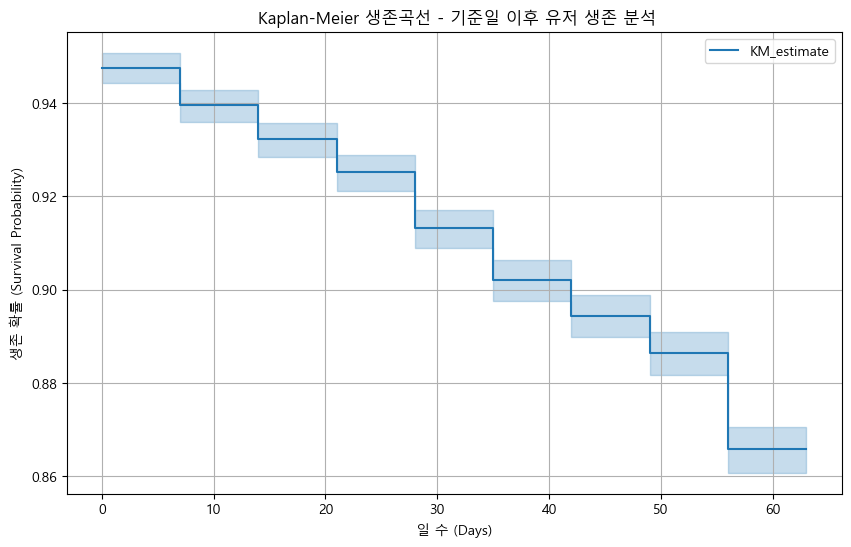

In [12]:
# 모델 생성
kmf = KaplanMeierFitter()

# 모델 피팅
kmf.fit(durations=df["duration"], event_observed=df["event"])

# 시각화
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title(" Kaplan-Meier 생존곡선 - 기준일 이후 유저 생존 분석")
plt.xlabel("일 수 (Days)")
plt.ylabel("생존 확률 (Survival Probability)")
plt.grid(True)
plt.show()


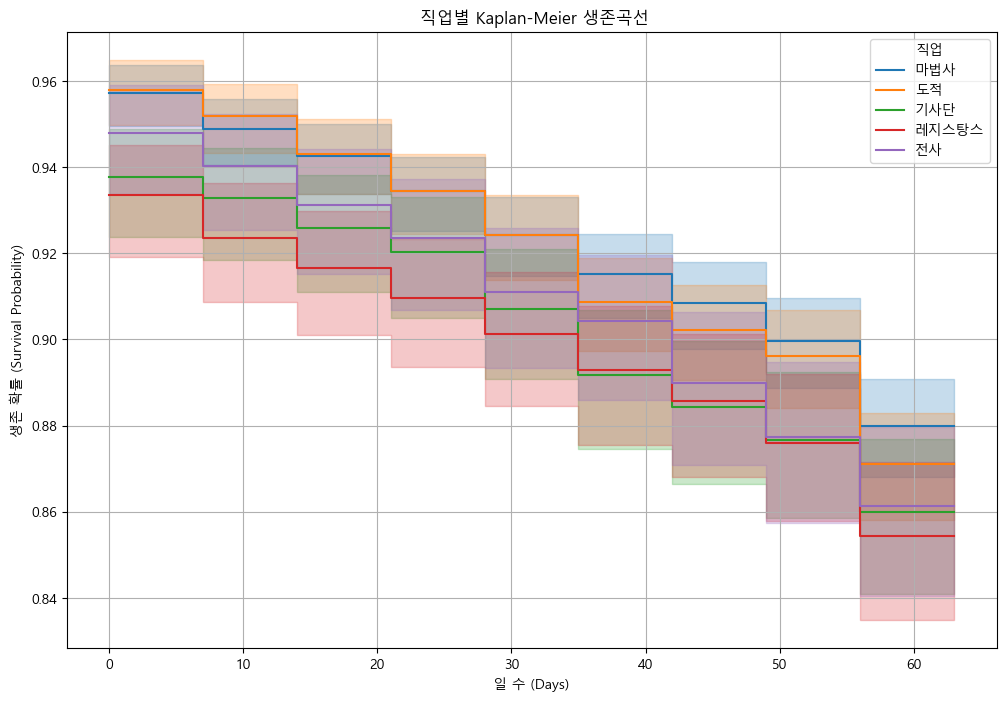

In [11]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("survival_ready_exp_based_2024-10-17.csv")

# 2. 직업 이름 컬럼 확인 (아래 중 하나일 가능성 높음)
job_col = "class_name"

# 3. 직업별 생존곡선 그리기 (상위 N개 직업만)
top_jobs = df[job_col].value_counts().head(5).index  # 상위 5개만

plt.figure(figsize=(12, 8))
for job in top_jobs:
    subset = df[df[job_col] == job]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset["duration"], event_observed=subset["event"], label=job)
    kmf.plot_survival_function()

plt.title(" 직업별 Kaplan-Meier 생존곡선")
plt.xlabel("일 수 (Days)")
plt.ylabel("생존 확률 (Survival Probability)")
plt.grid(True)
plt.legend(title="직업", loc="best")
plt.show()


In [14]:
from lifelines.statistics import logrank_test

# 예시: 마법사 vs 레지스탕스
wizard = df[df["class_name"] == "마법사"]
resist = df[df["class_name"] == "레지스탕스"]

result = logrank_test(wizard["duration"], resist["duration"],
                      event_observed_A=wizard["event"],
                      event_observed_B=resist["event"])
result.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.12 0.01      6.23

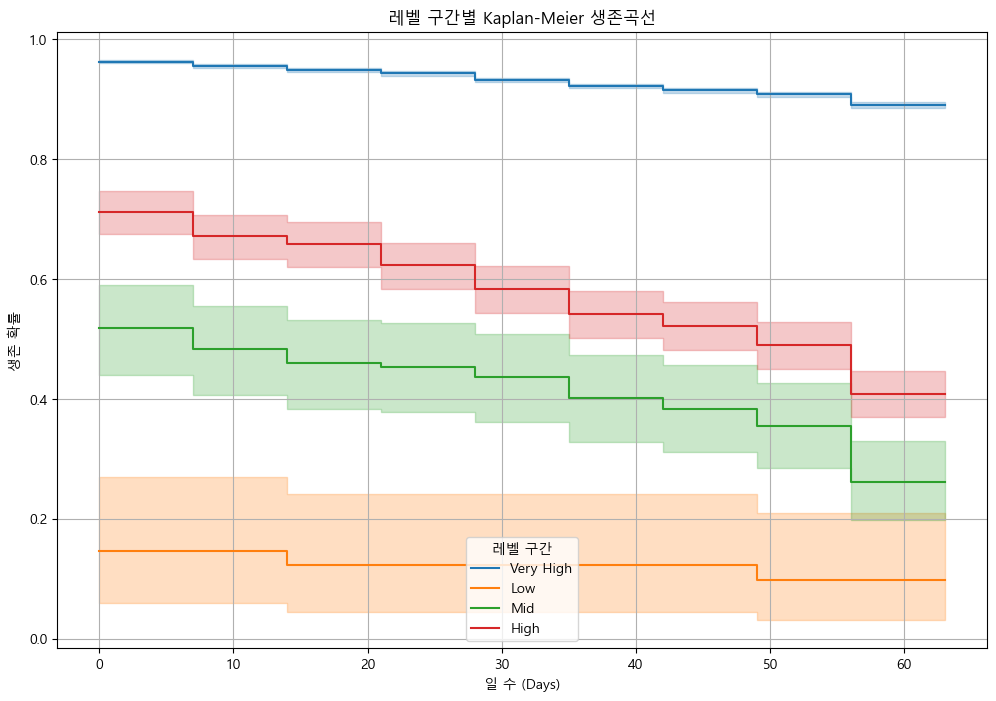

In [16]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("survival_ready_exp_based_2024-10-17.csv")

# 2. 레벨 구간 설정
def categorize_level(lv):
    if lv <= 200:
        return "Low"
    elif lv <= 230:
        return "Mid"
    elif lv <= 260:
        return "High"
    else:
        return "Very High"

df["level_group"] = df["character_level"].apply(categorize_level)

# 3. 생존곡선 시각화
plt.figure(figsize=(12, 8))
for group in df["level_group"].unique():
    subset = df[df["level_group"] == group]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset["duration"], event_observed=subset["event"], label=group)
    kmf.plot_survival_function()

plt.title("레벨 구간별 Kaplan-Meier 생존곡선")
plt.xlabel("일 수 (Days)")
plt.ylabel("생존 확률")
plt.grid(True)
plt.legend(title="레벨 구간", loc="best")
plt.show()


In [17]:
df["level_group"].value_counts()


level_group
Very High    17226
High           615
Mid            172
Low             41
Name: count, dtype: int64

In [38]:

import requests

# 1️⃣ ⛳️ Nexon Open API 키 입력
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 2️⃣ 🔍 현재 캐릭터 이름 + 서버명
character_name_now = "아델"
world_name = "스카니아"

# 3️⃣ 현재 이름으로 ocid 조회
ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name_now}&world_name={world_name}"
ocid_res = requests.get(ocid_url, headers=headers)

if ocid_res.status_code == 200:
    ocid = ocid_res.json()["ocid"]
    print(f"[✅ ocid 조회 완료] {character_name_now} (서버: {world_name}) → ocid: {ocid}")
else:
    print(f"[❌ 실패] 캐릭터명 또는 서버명이 잘못되었거나 API 문제: {ocid_res.status_code}")
    exit()

# 4️⃣ 2024-10-17 기준 캐릭터 정보 확인
past_url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date=2024-05-14"
past_res = requests.get(past_url, headers=headers)

if past_res.status_code == 200:
    past_name = past_res.json()["character_name"]
    print(f"[📅 2024-10-17 기준 이름] → {past_name}")

    # 5️⃣ 닉변 여부 판단
    if past_name != character_name_now:
        print(f"🔁 닉변 감지됨: {past_name} → {character_name_now}")
    else:
        print("✅ 닉변 없음, 동일 캐릭터")
else:
    print(f"[❌ 실패] 과거 정보 조회 실패: {past_res.status_code}")


[✅ ocid 조회 완료] 아델 (서버: 스카니아) → ocid: e0a4f439e53c369866b55297d2f5f4eb
[📅 2024-10-17 기준 이름] → 아델
✅ 닉변 없음, 동일 캐릭터


In [40]:
import pandas as pd
import requests
import time

# ✅ API 키 입력
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# ✅ 누락된 ocid-주차 조합 불러오기 (너가 만든 CSV 혹은 df로부터)
df_missing = pd.read_csv("API____________ocid-___.csv")  # 또는 DataFrame 직접 사용

# ✅ 결과 저장 리스트
results = []

# ✅ 요청 실행
for i, row in df_missing.iterrows():
    ocid = row["ocid"]
    date = row["missing_week"]

    url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={date}"
    res = requests.get(url, headers=headers)

    results.append({
        "ocid": ocid,
        "date": date,
        "status_code": res.status_code
    })

    print(f"[{i+1}/{len(df_missing)}] {date} - {ocid} → {res.status_code}")

    # ⏱️ 0.3초 쉬기 (초당 5건 이하 권장)
    time.sleep(0.3)

# ✅ 결과 DataFrame 저장
df_results = pd.DataFrame(results)
df_results.to_csv("api_check_results.csv", index=False)
print("✅ 결과 저장 완료: api_check_results.csv")


[1/1176] 2024-11-21 - 00e58482580d56535d779b76eda2ba59 → 200
[2/1176] 2024-11-28 - 00e58482580d56535d779b76eda2ba59 → 200
[3/1176] 2024-12-05 - 00e58482580d56535d779b76eda2ba59 → 200
[4/1176] 2024-12-12 - 00e58482580d56535d779b76eda2ba59 → 200
[5/1176] 2024-12-19 - 00e58482580d56535d779b76eda2ba59 → 200
[6/1176] 2024-11-21 - 01473dca4820e38edf7fdfedf319afab → 200
[7/1176] 2024-11-28 - 01473dca4820e38edf7fdfedf319afab → 200
[8/1176] 2024-12-05 - 01473dca4820e38edf7fdfedf319afab → 200
[9/1176] 2024-12-12 - 01473dca4820e38edf7fdfedf319afab → 200
[10/1176] 2024-12-19 - 01473dca4820e38edf7fdfedf319afab → 200
[11/1176] 2024-11-21 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[12/1176] 2024-11-28 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[13/1176] 2024-12-05 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[14/1176] 2024-12-12 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[15/1176] 2024-12-19 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[16/1176] 2024-11-28 - 01c402afd26578b3717165bcac9d4917 → 200
[17/1176] 2024-12

KeyboardInterrupt: 

In [41]:
import pandas as pd
import requests
import time

# ✅ API 키 입력
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# ✅ 누락된 ocid-주차 조합 불러오기 (너가 만든 CSV 혹은 df로부터)
df_missing = pd.read_csv("API____________ocid-___.csv")  # 또는 DataFrame 직접 사용

# ✅ 결과 저장 리스트
results = []

# ✅ 요청 실행
for i, row in df_missing.iterrows():
    ocid = row["ocid"]
    date = row["missing_week"]

    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?ocid={ocid}&date={date}"
    res = requests.get(url, headers=headers)

    results.append({
        "ocid": ocid,
        "date": date,
        "status_code": res.status_code
    })

    print(f"[{i+1}/{len(df_missing)}] {date} - {ocid} → {res.status_code}")

    # ⏱️ 0.3초 쉬기 (초당 5건 이하 권장)
    time.sleep(0.3)

# ✅ 결과 DataFrame 저장
df_results = pd.DataFrame(results)
df_results.to_csv("api_check_results.csv", index=False)
print("✅ 결과 저장 완료: api_check_results.csv")


[1/1176] 2024-11-21 - 00e58482580d56535d779b76eda2ba59 → 200
[2/1176] 2024-11-28 - 00e58482580d56535d779b76eda2ba59 → 200
[3/1176] 2024-12-05 - 00e58482580d56535d779b76eda2ba59 → 200
[4/1176] 2024-12-12 - 00e58482580d56535d779b76eda2ba59 → 200
[5/1176] 2024-12-19 - 00e58482580d56535d779b76eda2ba59 → 200
[6/1176] 2024-11-21 - 01473dca4820e38edf7fdfedf319afab → 200
[7/1176] 2024-11-28 - 01473dca4820e38edf7fdfedf319afab → 200
[8/1176] 2024-12-05 - 01473dca4820e38edf7fdfedf319afab → 200
[9/1176] 2024-12-12 - 01473dca4820e38edf7fdfedf319afab → 200
[10/1176] 2024-12-19 - 01473dca4820e38edf7fdfedf319afab → 200
[11/1176] 2024-11-21 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[12/1176] 2024-11-28 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[13/1176] 2024-12-05 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[14/1176] 2024-12-12 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[15/1176] 2024-12-19 - 01b91e29d5494a2c66f2c68bf61bad27 → 200
[16/1176] 2024-11-28 - 01c402afd26578b3717165bcac9d4917 → 200
[17/1176] 2024-12

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 날짜 설정
target_date = "2024-10-31"

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"]}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 60001)]
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행

detailed_info = []
with ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

In [1]:
import requests
import time

# 🔑 API 키 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"  # 여기에 실제 API 키 넣어줘
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 📅 날짜 설정
target_date = "2024-10-31"

# 📦 초기 변수
page = 1
level_cutoff = 270
high_level_characters = []

print("▶ 270레벨 이상 캐릭터 수집 시작")

# 🔁 랭킹 페이지 순회
while True:
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    res = session.get(url)

    if res.status_code != 200:
        print(f"❌ Page {page} 호출 실패: {res.status_code}")
        break

    data = res.json().get("ranking", [])
    if not data:
        print("📭 더 이상 데이터 없음. 중단")
        break

    # 🧠 270레벨 이상 캐릭터만 추출
    high_lv = [char["character_name"] for char in data if char["character_level"] >= level_cutoff]
    high_level_characters.extend(high_lv)

    print(f"📦 Page {page}: {len(high_lv)}명 추가 (누적: {len(high_level_characters)})")

    # ⛔ 모든 캐릭터가 270 미만이면 중단
    if all(char["character_level"] < level_cutoff for char in data):
        print(f"⛔ Page {page}에서 전부 270 미만 → 중단")
        break

    page += 1
    time.sleep(0.15)  # ✅ 초당 5회 제한 고려한 대기시간

# ✅ 결과 출력
print(f"\n✅ 최종 270레벨 이상 캐릭터 수: {len(high_level_characters)}명")
print("📋 예시 캐릭터 10명:")
print(high_level_characters[:10])


▶ 270레벨 이상 캐릭터 수집 시작
📦 Page 1: 200명 추가 (누적: 200)
📦 Page 2: 200명 추가 (누적: 400)
📦 Page 3: 200명 추가 (누적: 600)
📦 Page 4: 200명 추가 (누적: 800)
📦 Page 5: 200명 추가 (누적: 1000)
📦 Page 6: 200명 추가 (누적: 1200)
📦 Page 7: 200명 추가 (누적: 1400)
📦 Page 8: 200명 추가 (누적: 1600)
📦 Page 9: 200명 추가 (누적: 1800)
📦 Page 10: 200명 추가 (누적: 2000)
📦 Page 11: 200명 추가 (누적: 2200)
📦 Page 12: 200명 추가 (누적: 2400)
📦 Page 13: 200명 추가 (누적: 2600)
📦 Page 14: 200명 추가 (누적: 2800)
📦 Page 15: 200명 추가 (누적: 3000)
📦 Page 16: 200명 추가 (누적: 3200)
📦 Page 17: 200명 추가 (누적: 3400)
📦 Page 18: 200명 추가 (누적: 3600)
📦 Page 19: 200명 추가 (누적: 3800)
📦 Page 20: 200명 추가 (누적: 4000)
📦 Page 21: 200명 추가 (누적: 4200)
📦 Page 22: 200명 추가 (누적: 4400)
📦 Page 23: 200명 추가 (누적: 4600)
📦 Page 24: 200명 추가 (누적: 4800)
📦 Page 25: 200명 추가 (누적: 5000)
📦 Page 26: 200명 추가 (누적: 5200)
📦 Page 27: 200명 추가 (누적: 5400)
📦 Page 28: 200명 추가 (누적: 5600)
📦 Page 29: 200명 추가 (누적: 5800)
📦 Page 30: 200명 추가 (누적: 6000)
📦 Page 31: 200명 추가 (누적: 6200)
📦 Page 32: 200명 추가 (누적: 6400)
📦 Page 33: 200명 추가 (누적: 6600)
📦 

In [6]:
import requests
import time
import pandas as pd
from urllib.parse import quote  # ✅ URL 인코딩용

# 🔑 API 키 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"  # ← 실제 API 키로 교체해줘!
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 📅 기준 날짜 설정
target_date = "2024-10-17"
level_cutoff = 270
page = 1

# 🧺 결과 저장 리스트
character_info = []

print(f"▶ {target_date} 기준 270레벨 이상 캐릭터 수집 시작")

while True:
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    res = session.get(url)

    if res.status_code != 200:
        print(f"❌ Page {page} 호출 실패: {res.status_code}")
        break

    data = res.json().get("ranking", [])
    if not data:
        print("📭 데이터 없음 → 종료")
        break

    # 🧠 270 이상 캐릭터만 필터링
    filtered = [char for char in data if char["character_level"] >= level_cutoff]
    print(f"📦 Page {page}: {len(filtered)}명")

    for char in filtered:
        name = char["character_name"]
        world = char["world_name"]

        # ✅ URL-safe 인코딩
        name_encoded = quote(name)
        world_encoded = quote(world)

        try:
            url_id = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name_encoded}&world_name={world_encoded}"
            res_id = session.get(url_id)
            if res_id.status_code == 200:
                ocid = res_id.json().get("ocid")
                character_info.append({
                    "character_name": name,
                    "world_name": world,
                    "ocid": ocid
                })
            else:
                print(f"❌ ocid 오류: {name} ({world}) - 상태 {res_id.status_code}")
        except Exception as e:
            print(f"❌ 예외 발생: {name} ({world}) - {e}")

        time.sleep(0.05)  # 🕒 ocid 호출 간 간격

    # ⛔ 전체 페이지가 270 미만이면 break
    if all(char["character_level"] < level_cutoff for char in data):
        print(f"⛔ Page {page}는 전부 270 미만 → 종료")
        break

    page += 1
    time.sleep(0.15)  # 🕒 ranking 호출 간 간격

# ✅ 저장
df = pd.DataFrame(character_info)
output_path = f"maple_270plus_ocid_{target_date}.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"\n✅ 최종 {len(df)}명 수집 완료. 파일 저장됨: {output_path}")


▶ 2024-10-17 기준 270레벨 이상 캐릭터 수집 시작
📦 Page 1: 200명
❌ ocid 오류: 걍조 (스카니아) - 상태 400
❌ ocid 오류: Kiss예진 (엘리시움) - 상태 400
❌ ocid 오류: sure (크로아) - 상태 400
📦 Page 2: 200명
❌ ocid 오류: 독주 (크로아) - 상태 400
📦 Page 3: 200명
❌ ocid 오류: 홀덤포커스 (스카니아) - 상태 400
❌ ocid 오류: 카카 (루나) - 상태 400
❌ ocid 오류: 감팡검 (크로아) - 상태 400
❌ ocid 오류: 봇치더항성 (루나) - 상태 400
📦 Page 4: 200명
❌ ocid 오류: 퍼플색매화 (루나) - 상태 400
❌ ocid 오류: 똑돈 (베라) - 상태 400
❌ ocid 오류: 그라벳 (스카니아) - 상태 400
❌ ocid 오류: 당신아버지 (스카니아) - 상태 400
❌ ocid 오류: 코츠 (베라) - 상태 400
📦 Page 5: 200명
❌ ocid 오류: 고광제 (루나) - 상태 400
❌ ocid 오류: 도동보 (스카니아) - 상태 400
❌ ocid 오류: 끌려 (엘리시움) - 상태 400
❌ ocid 오류: 마젠타 (엘리시움) - 상태 400
📦 Page 6: 200명
❌ ocid 오류: 구시눈 (루나) - 상태 400
❌ ocid 오류: Poten (베라) - 상태 400
📦 Page 7: 200명
❌ ocid 오류: 윈드차련 (스카니아) - 상태 400
❌ ocid 오류: 엽토 (엘리시움) - 상태 400
❌ ocid 오류: 블랙잭 (크로아) - 상태 400
❌ ocid 오류: 비비안 (엘리시움) - 상태 400
❌ ocid 오류: 찰리 (베라) - 상태 400
📦 Page 8: 200명
📦 Page 9: 200명
❌ ocid 오류: 고늑앓이 (루나) - 상태 400
❌ ocid 오류: 스물두번의길 (루나) - 상태 400
❌ ocid 오류: 마인 (크로아) - 상태 400
❌ ocid 오류:

KeyboardInterrupt: 

In [ ]:
import requests
import pandas as pd
from urllib.parse import quote
from concurrent.futures import ThreadPoolExecutor, as_completed

# 🔑 API 설정
API_KEY = "live_6da477cce0d1ca918d4917fc55b8268d0849d7b5746a5e7acdace78398868480efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 📅 날짜
target_date = "2024-10-17"
level_cutoff = 270
page = 1
character_info = []

print(f"▶ {target_date} 기준 270레벨 이상 캐릭터 수집 시작")

# 1️⃣ 랭킹 크롤링
while True:
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    res = session.get(url)

    if res.status_code != 200:
        print(f"❌ Page {page} 호출 실패: {res.status_code}")
        break

    data = res.json().get("ranking", [])
    if not data:
        print("📭 데이터 없음 → 종료")
        break

    filtered = [char for char in data if char["character_level"] >= level_cutoff]
    print(f"📦 Page {page}: {len(filtered)}명")

    for char in filtered:
        character_info.append({
            "character_name": char["character_name"],
            "world_name": char["world_name"]
        })

    if all(char["character_level"] < level_cutoff for char in data):
        print(f"⛔ Page {page}는 전부 270 미만 → 종료")
        break

    page += 1

print(f"🔍 총 {len(character_info)}명 대상")

# 2️⃣ ocid 병렬 조회
def fetch_ocid(user):
    name = quote(user["character_name"].strip())
    world = quote(user["world_name"].strip())
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=3)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
            user["status"] = "success"
        else:
            user["ocid"] = None
            user["status"] = f"fail_{res.status_code}"
            print(f"❌ ocid 오류: {user['character_name']} ({user['world_name']}) - 상태 {res.status_code}")
    except Exception as e:
        user["ocid"] = None
        user["status"] = f"exception: {e}"
        print(f"❌ 예외: {user['character_name']} - {e}")
    return user

print("🚀 병렬 ocid 조회 시작")

results = []
with ThreadPoolExecutor(max_workers=100) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in character_info]
    for future in as_completed(futures):
        results.append(future.result())

# 3️⃣ 성공/실패 나눠서 저장
df = pd.DataFrame(results)
df_success = df[df["status"] == "success"]
df_fail = df[df["status"] != "success"]

df_success.to_csv(f"maple_270plus_ocid_{target_date}.csv", index=False, encoding="utf-8-sig")
df_fail.to_csv(f"maple_270plus_ocid_failed_{target_date}.csv", index=False, encoding="utf-8-sig")

print(f"\n✅ 성공: {len(df_success)}명 저장 완료")
print(f"❌ 실패: {len(df_fail)}명 저장 → maple_270plus_ocid_failed_{target_date}.csv")


▶ 2024-10-17 기준 270레벨 이상 캐릭터 수집 시작
📦 Page 1: 200명
📦 Page 2: 200명
📦 Page 3: 200명
📦 Page 4: 200명
📦 Page 5: 200명
📦 Page 6: 200명
📦 Page 7: 200명
📦 Page 8: 200명
📦 Page 9: 200명
📦 Page 10: 200명
📦 Page 11: 200명
📦 Page 12: 200명
📦 Page 13: 200명
📦 Page 14: 200명
📦 Page 15: 200명
📦 Page 16: 200명
📦 Page 17: 200명
📦 Page 18: 200명
📦 Page 19: 200명
📦 Page 20: 200명
📦 Page 21: 200명
📦 Page 22: 200명
📦 Page 23: 200명
📦 Page 24: 200명
📦 Page 25: 200명
📦 Page 26: 200명
📦 Page 27: 200명
📦 Page 28: 200명
📦 Page 29: 200명
📦 Page 30: 200명
📦 Page 31: 200명
📦 Page 32: 200명
📦 Page 33: 200명
📦 Page 34: 200명
📦 Page 35: 200명
📦 Page 36: 200명
📦 Page 37: 200명
📦 Page 38: 200명
📦 Page 39: 200명
📦 Page 40: 200명
📦 Page 41: 200명
📦 Page 42: 200명
📦 Page 43: 200명
📦 Page 44: 200명
📦 Page 45: 200명
📦 Page 46: 200명
📦 Page 47: 200명
📦 Page 48: 200명
📦 Page 49: 200명
📦 Page 50: 200명
📦 Page 51: 200명
📦 Page 52: 200명
📦 Page 53: 200명
📦 Page 54: 200명
📦 Page 55: 200명
📦 Page 56: 200명
📦 Page 57: 200명
📦 Page 58: 200명
📦 Page 59: 200명
📦 Page 60: 200명
📦 Page 61: 200